# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing 

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
data = pd.read_csv('/Users/sazid/Downloads/iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

In [32]:
x = pd.DataFrame(data)



# Clustering (unscaled data)

Separate the original data into 2 clusters.

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [33]:
x_clean = preprocessing.scale(x)
x_clean

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [34]:
kmean = KMeans(2)
kmean.fit(x_clean)


KMeans(n_clusters=2)

In [35]:
z=kmean.fit_predict(x_clean)
x['cluster']=z

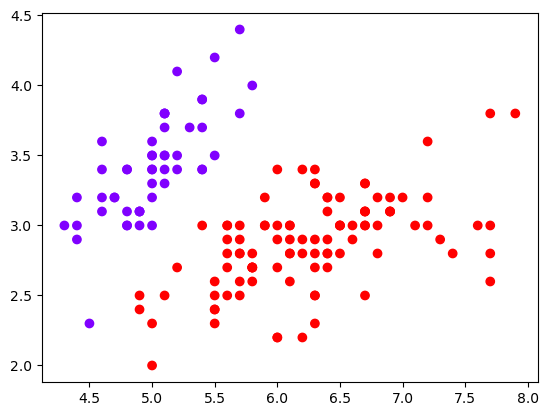

In [36]:
mat.scatter(x['sepal_length'],x['sepal_width'], c=x['cluster'], cmap='rainbow')

In [37]:
kmean.inertia_

223.73200573676348

## Take Advantage of the Elbow Method

### WCSS

In [38]:
wcss = []

for i in range(1,11):
    kmean = KMeans(i)
    kmean.fit(x_clean)
    wcss.append(kmean.inertia_)

### The Elbow Method

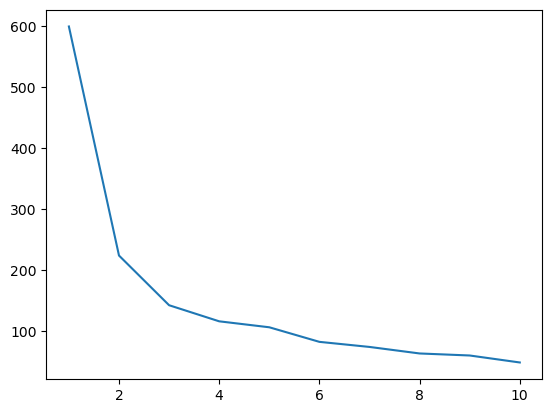

In [39]:
mat.plot(range(1,11), wcss)

How many clusters are there?

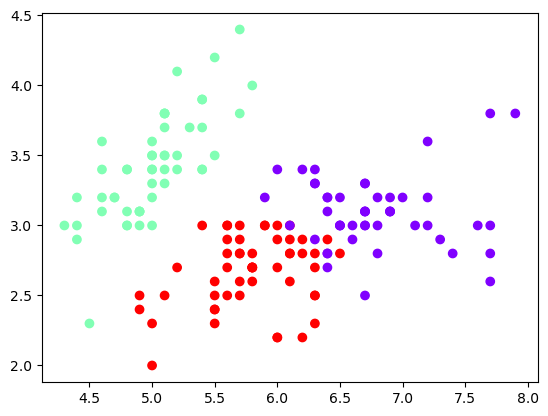

In [40]:
kmean = KMeans(3)
kmean.fit(x_clean)

x['cluster']= kmean.fit_predict(x_clean)

mat.scatter(x['sepal_length'],x['sepal_width'], c=x['cluster'], cmap='rainbow')

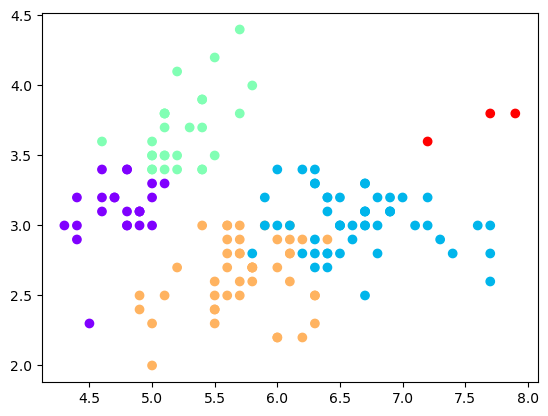

In [41]:
kmean = KMeans(5)
kmean.fit(x_clean)

x['cluster']= kmean.fit_predict(x_clean)

mat.scatter(x['sepal_length'],x['sepal_width'], c=x['cluster'], cmap='rainbow')

In [44]:
data2= pd.read_csv('/Users/sazid/Downloads/iris_with_answers.csv')
data2.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [56]:
data2['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
count1 = data2[data2['species']=='versicolor']

In [62]:
count1

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [63]:
count1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


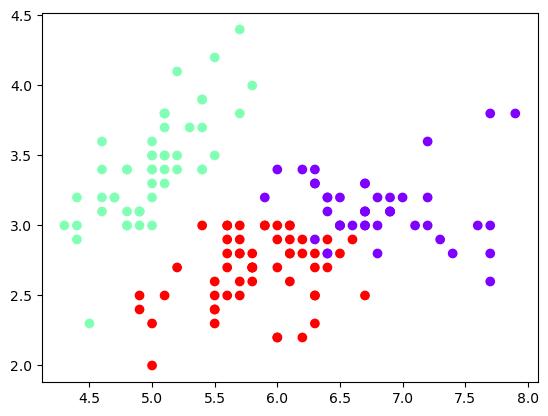

In [60]:
kmean = KMeans(3)
kmean.fit(x_clean)

x['cluster']= kmean.fit_predict(x_clean)

mat.scatter(x['sepal_length'],x['sepal_width'], c=x['cluster'], cmap='rainbow')